# test what happens when i flip the voxel data to RAS and then save the nifti

In [ ]:
import nibabel as nib
print(nib.__version__)
import SimpleITK as stik



nifti_path = "/home/ayeluru/vascular-superenhancement-4d-flow/working_dir/all_patients/patient_data/Amupam/nifti/3d_cine_Amupam.nii.gz"


In [26]:

# load the nifti file using nibabel
nifti_file_nib = nib.load(nifti_path)
# get the voxel data from nibabel
nifti_nib = nifti_file_nib.get_fdata()
print(nifti_nib.shape)
# flip the voxel data axes to RAS
# nifti_nib = nifti_nib[::-1, ::-1, :]
print(nifti_nib.shape)

(512, 512, 96, 20)
(512, 512, 96, 20)


In [28]:
# load the nifti file using simpleitk
nifti_file_sit = stik.ReadImage(nifti_path)
# get the voxel data from simpleitk
nifti_sit = stik.GetArrayFromImage(nifti_file_sit)
print(nifti_sit.shape)

# transpose the voxel data axes to RAS
# nifti_sit = np.transpose(nifti_sit, (3, 2, 1, 0))
print(nifti_sit.shape)


(20, 96, 512, 512)
(20, 96, 512, 512)


## visualize

/tmp/ipykernel_2199202/2901152351.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))


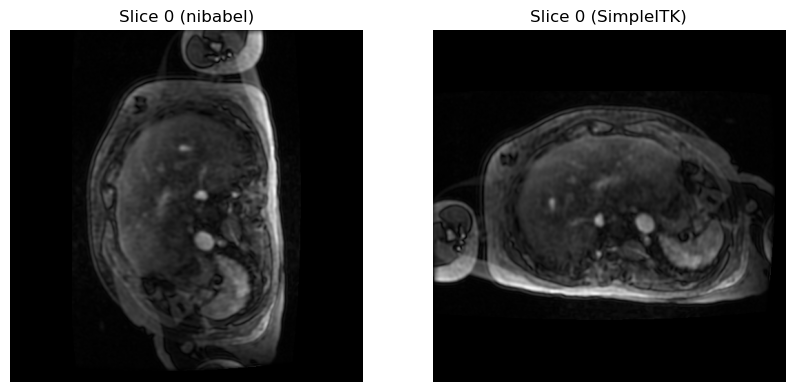

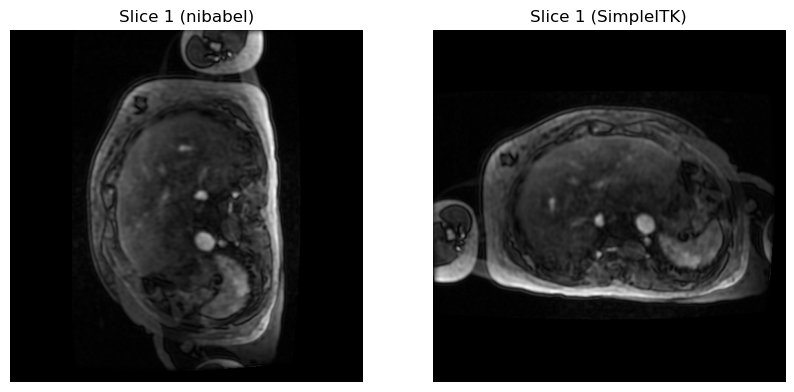

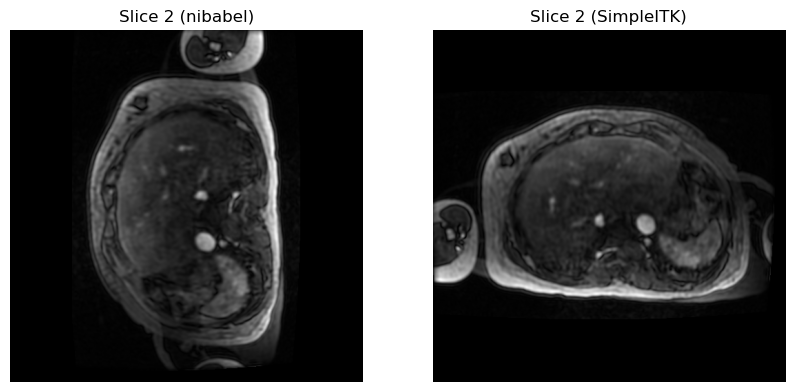

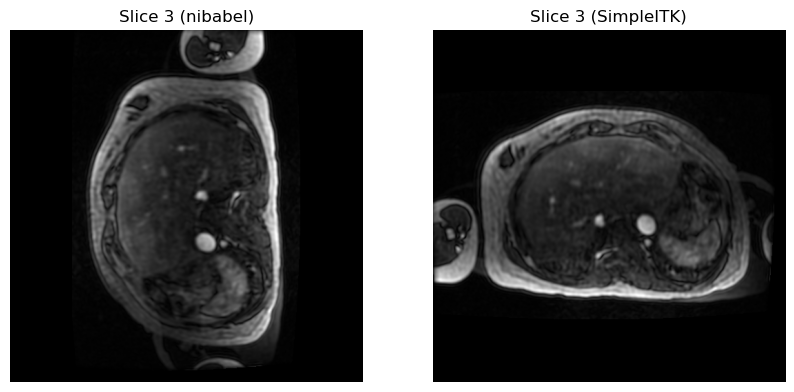

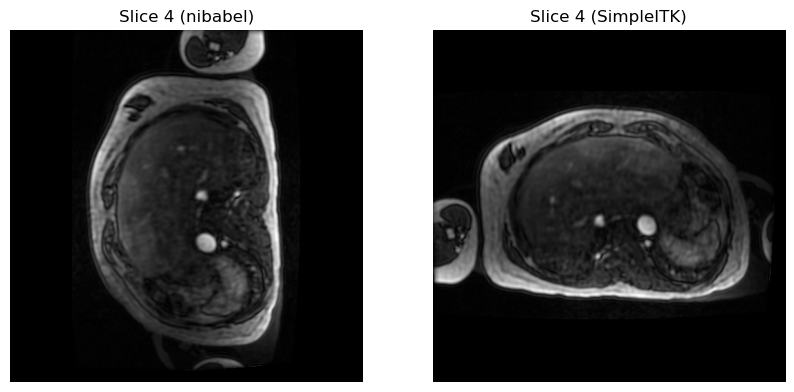

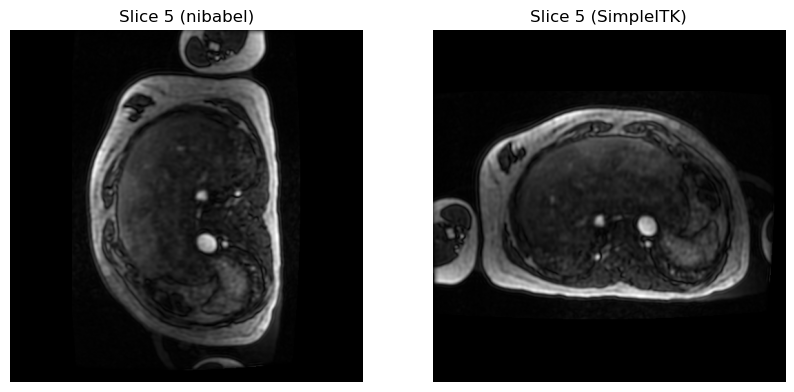

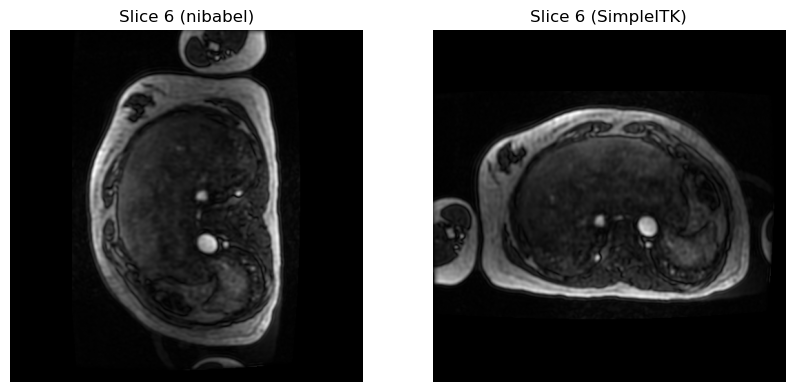

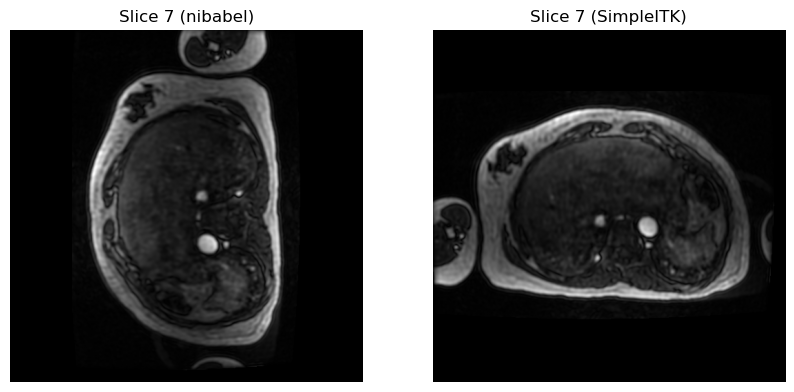

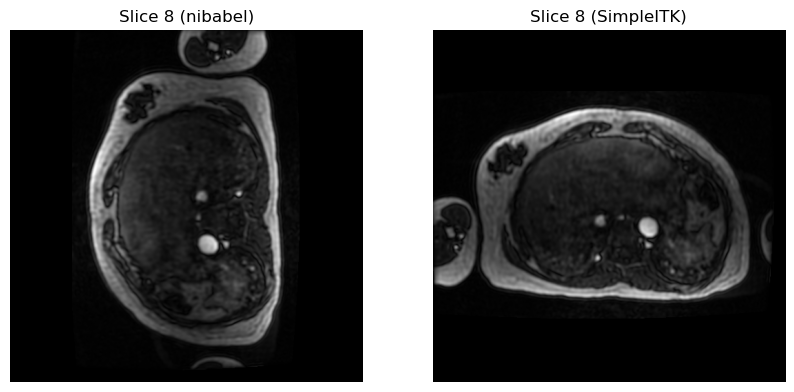

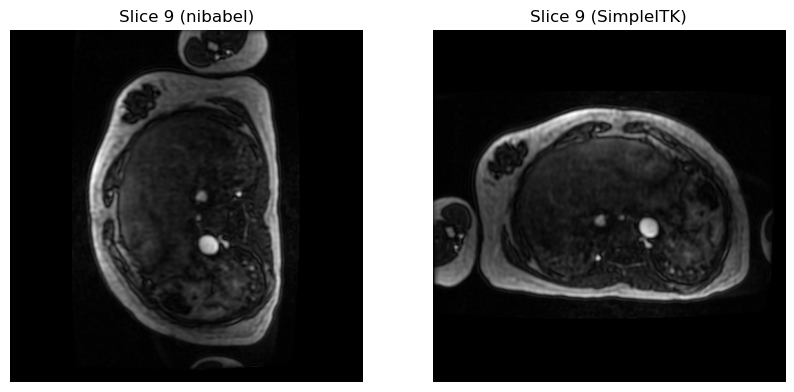

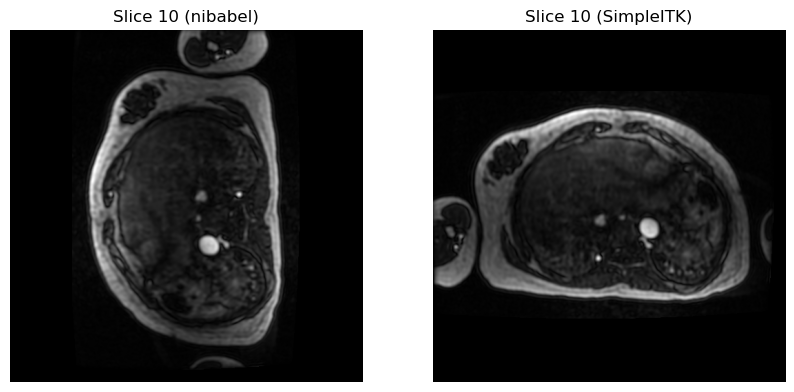

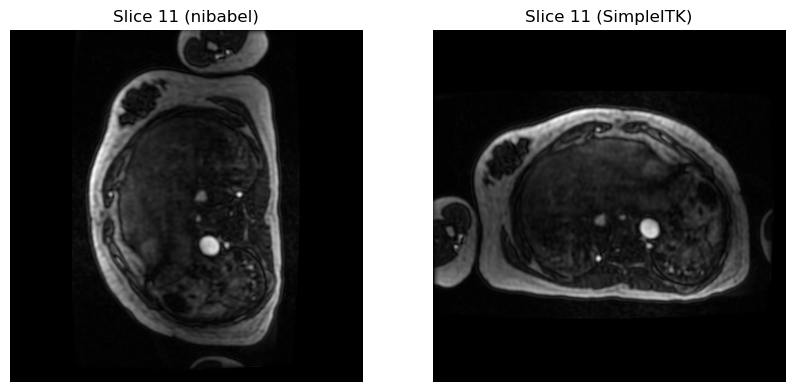

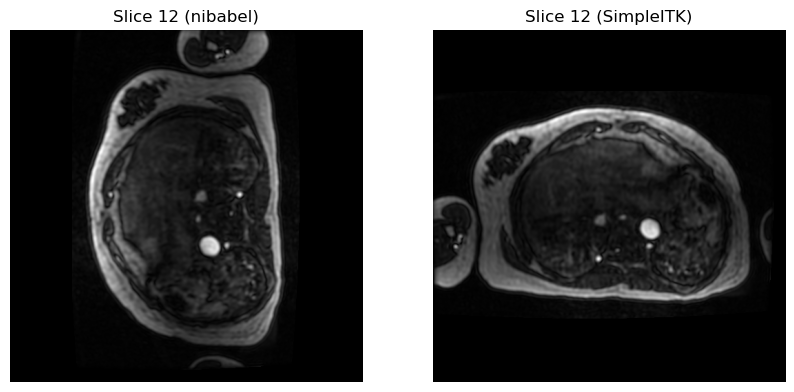

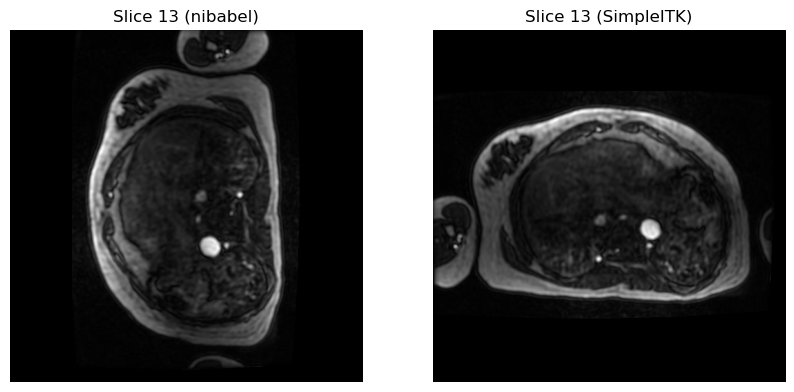

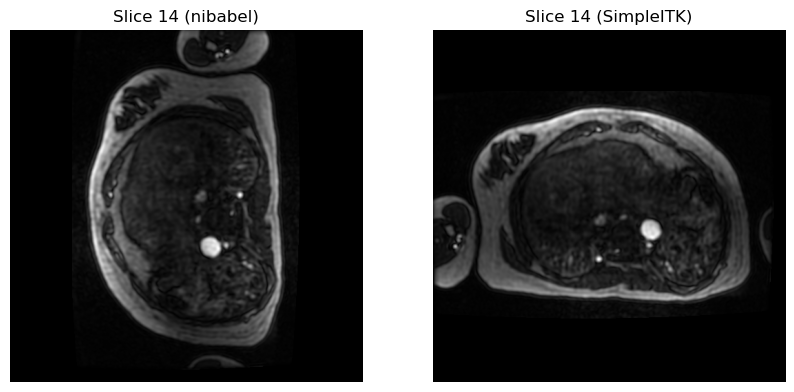

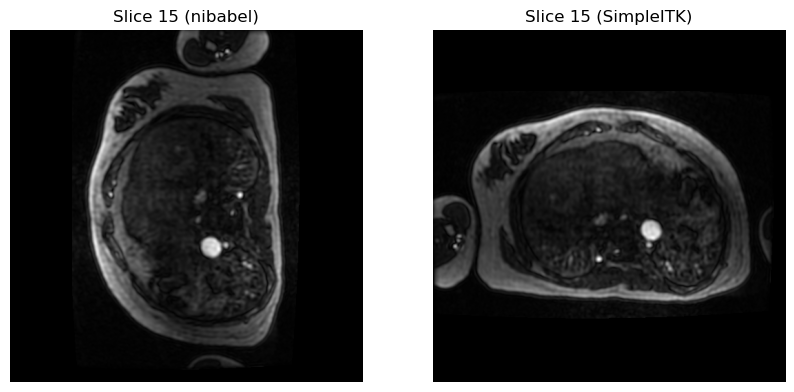

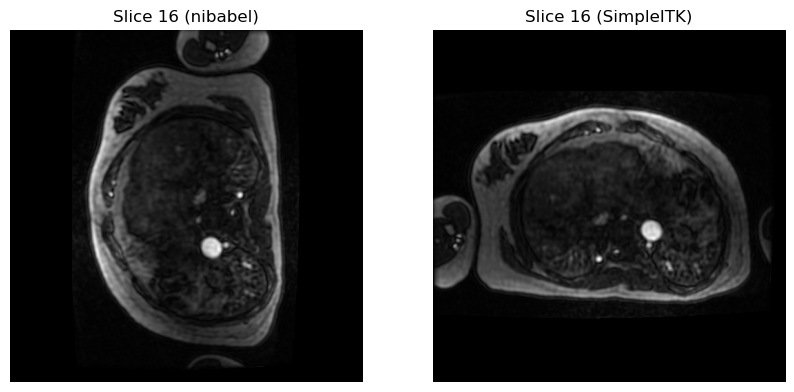

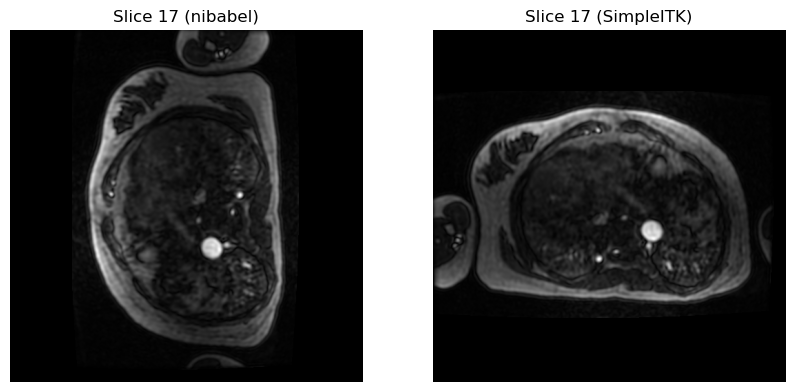

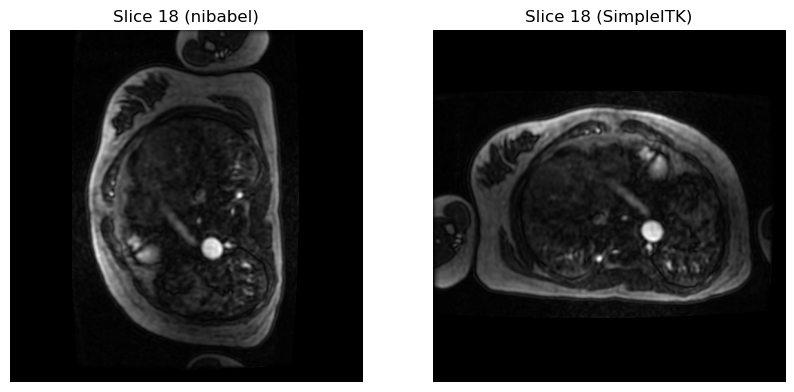

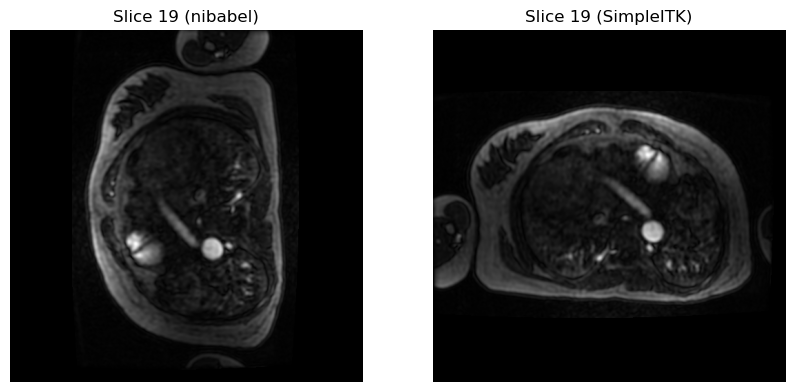

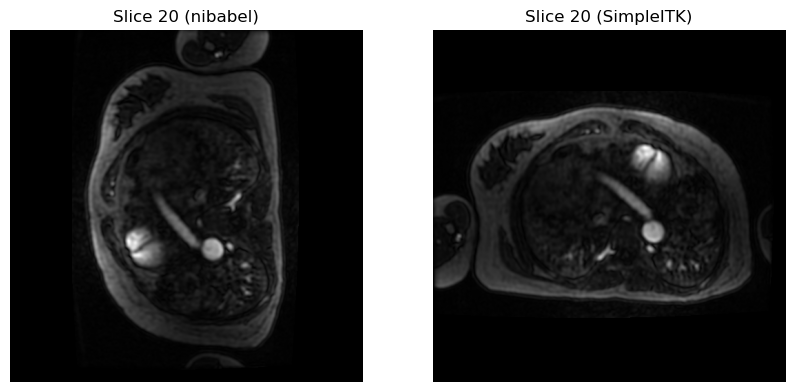

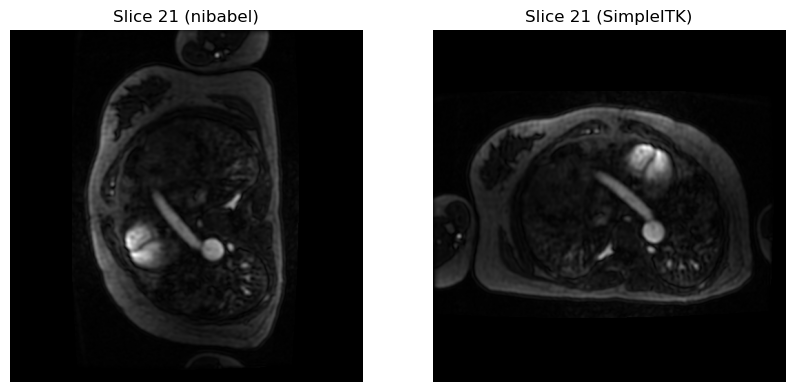

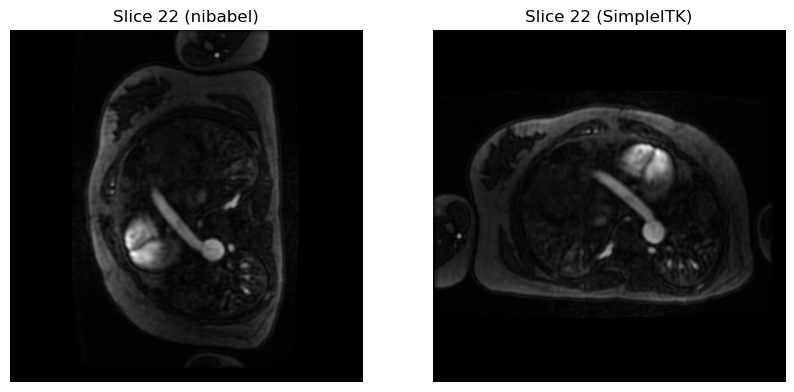

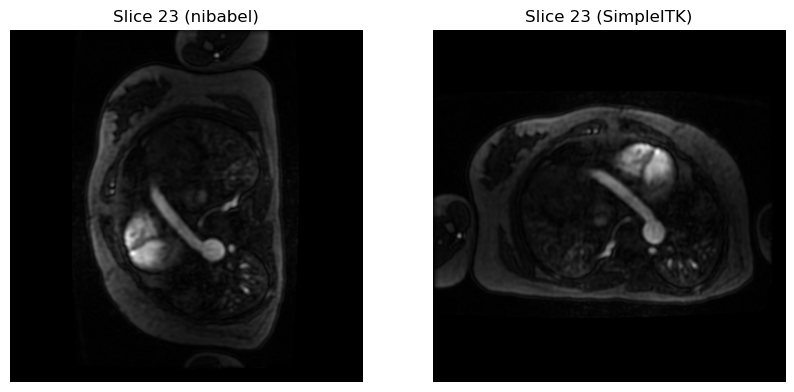

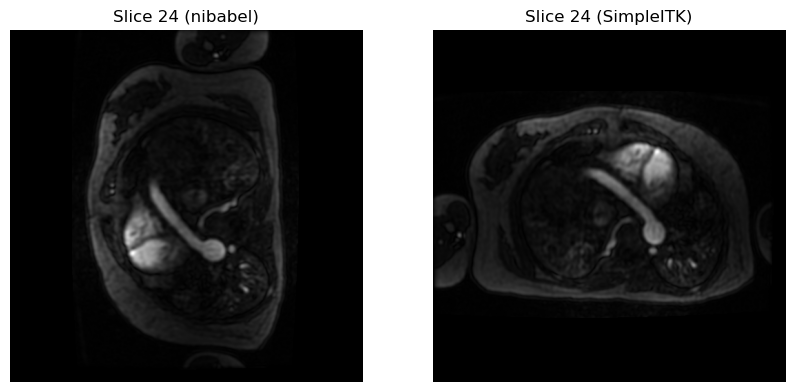

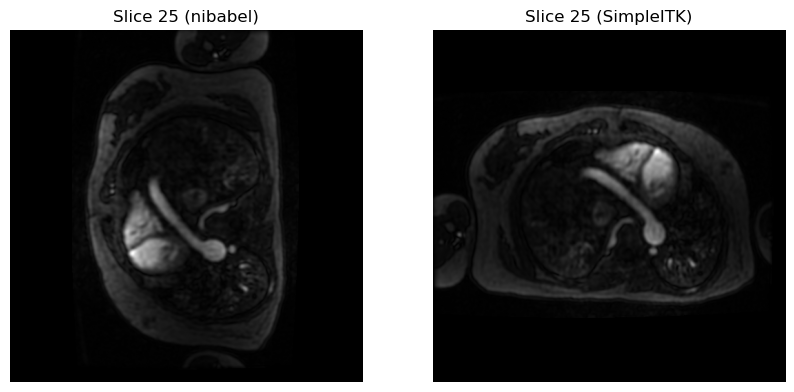

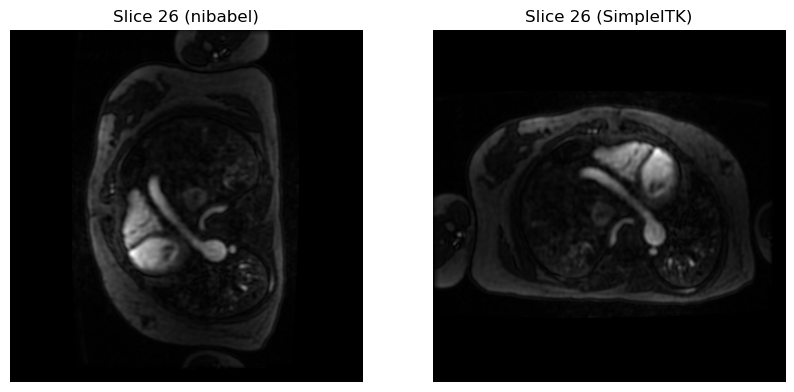

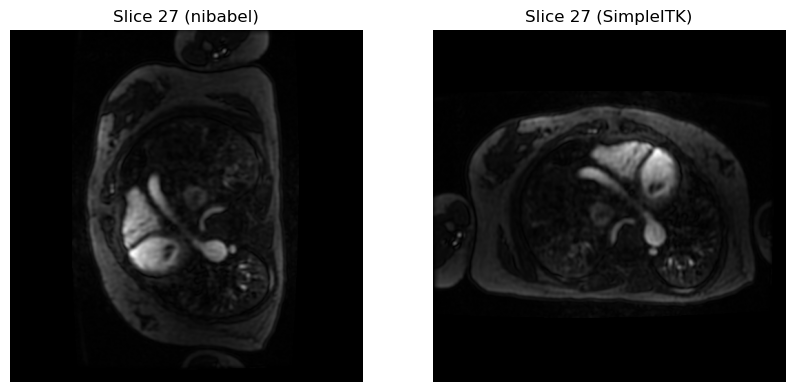

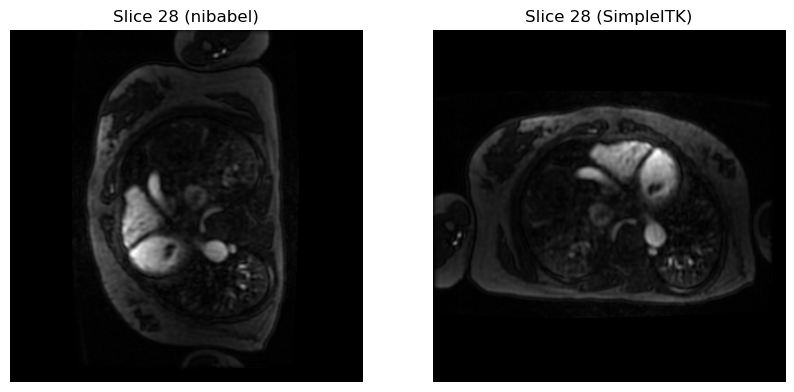

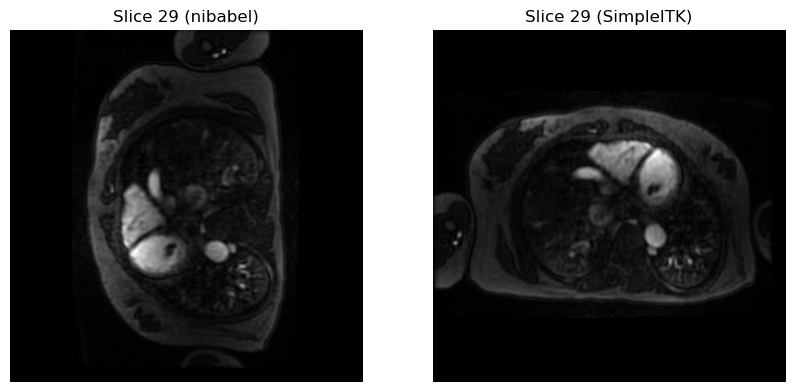

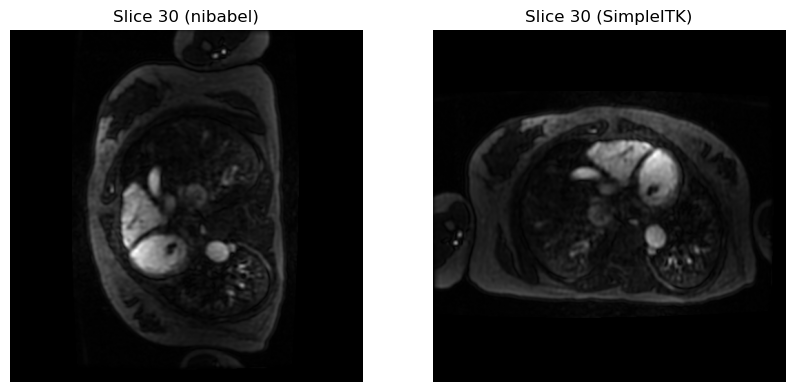

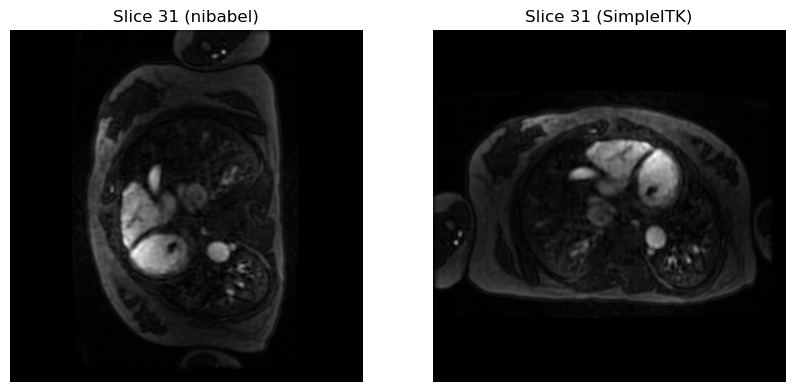

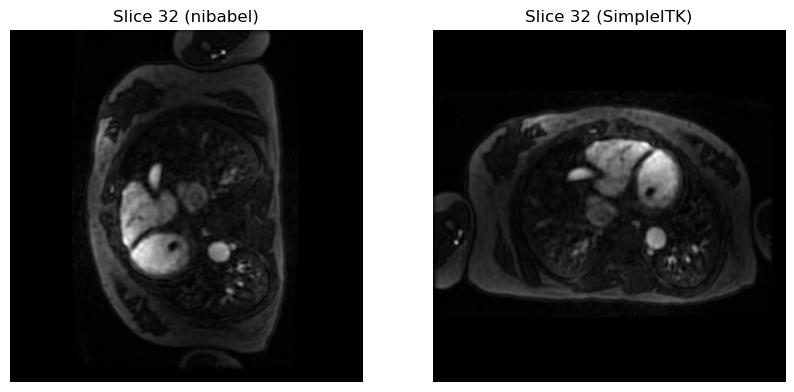

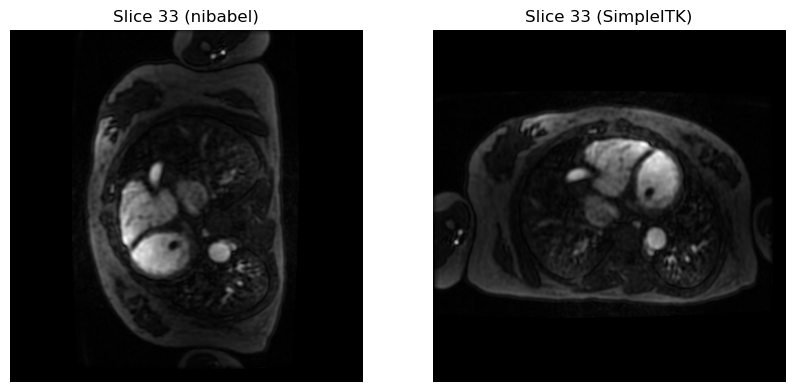

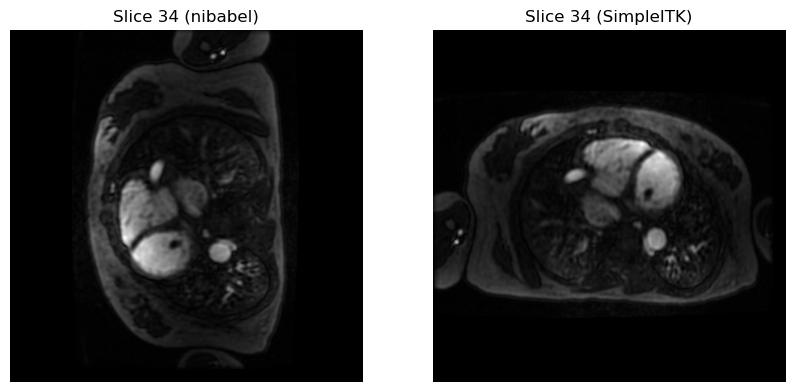

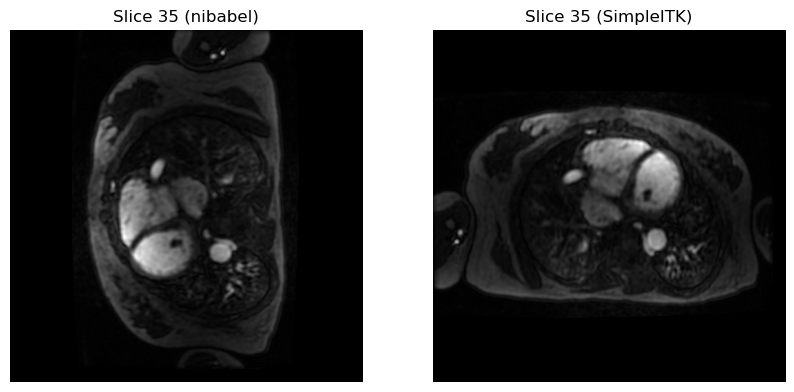

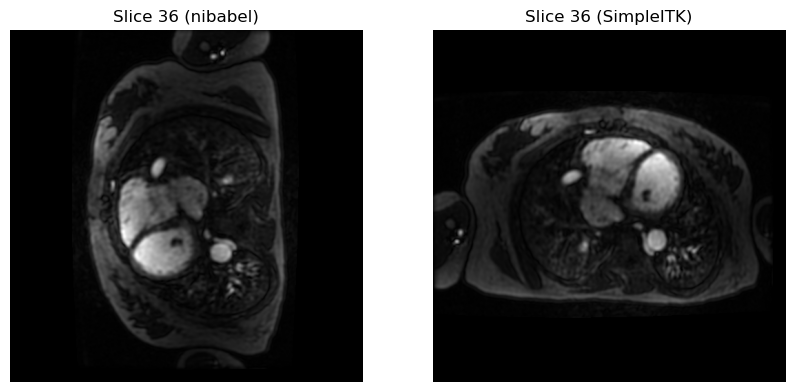

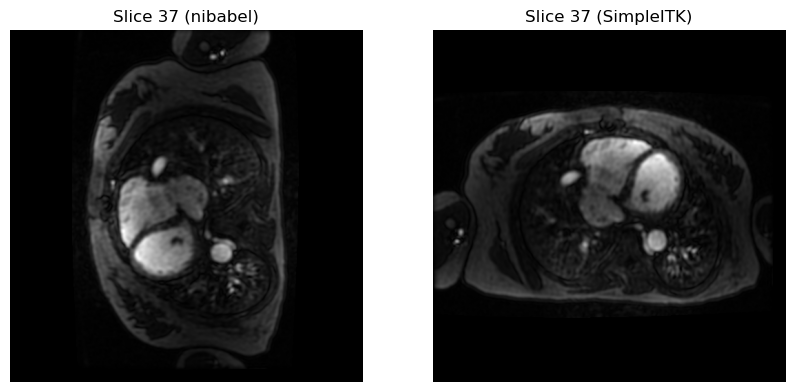

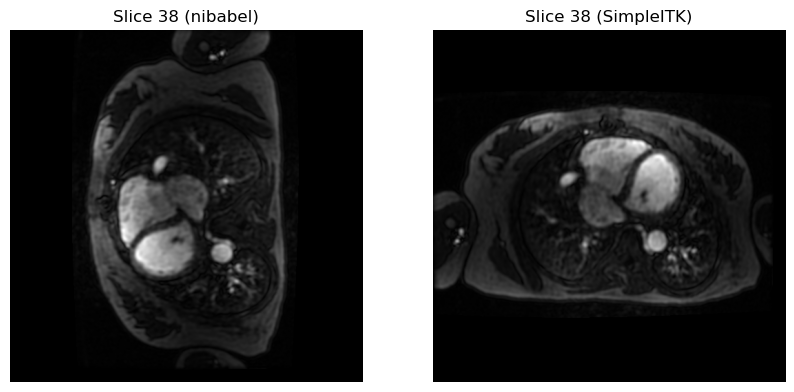

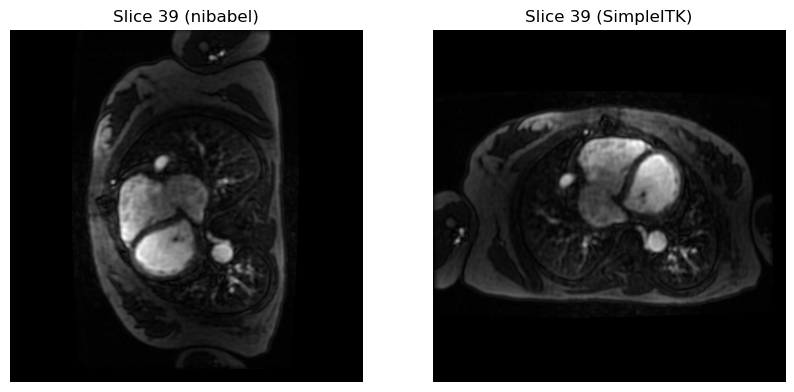

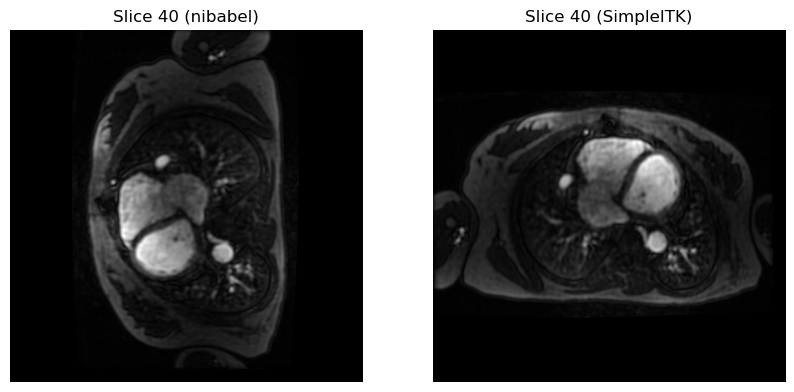

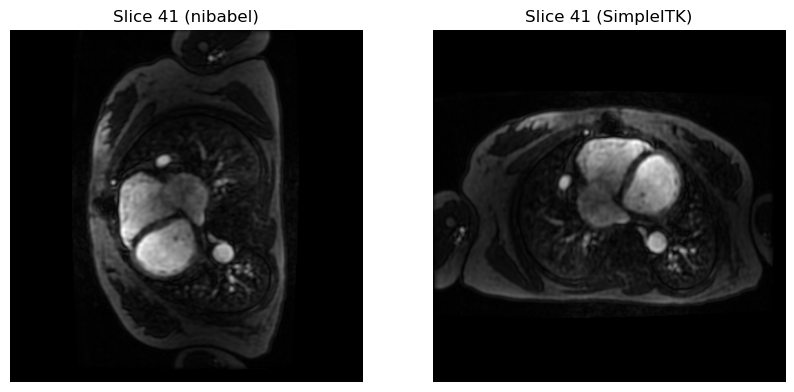

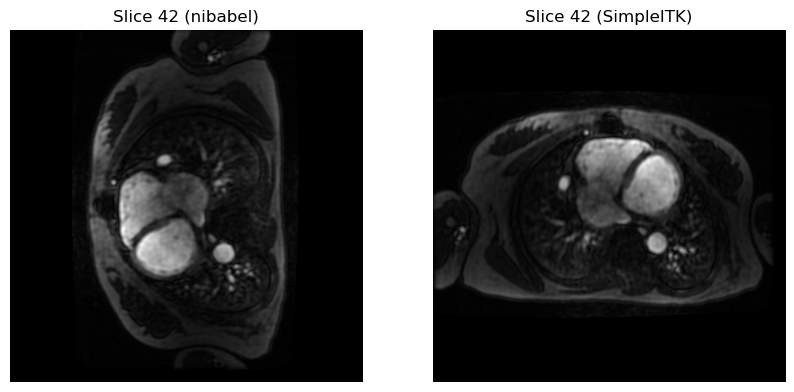

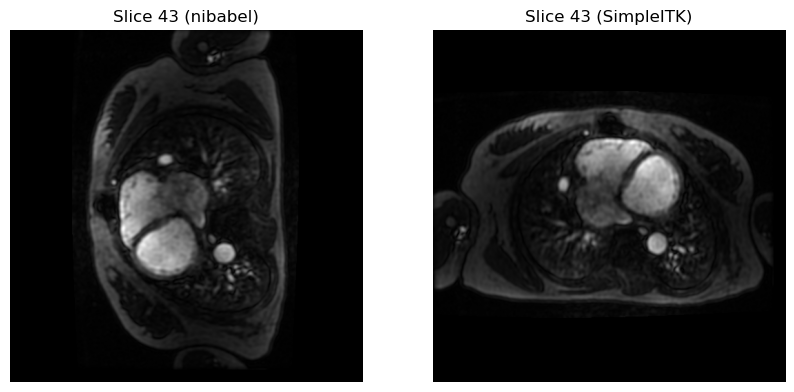

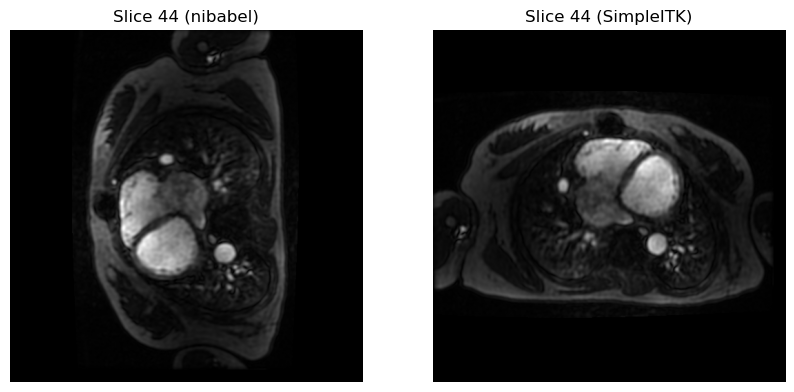

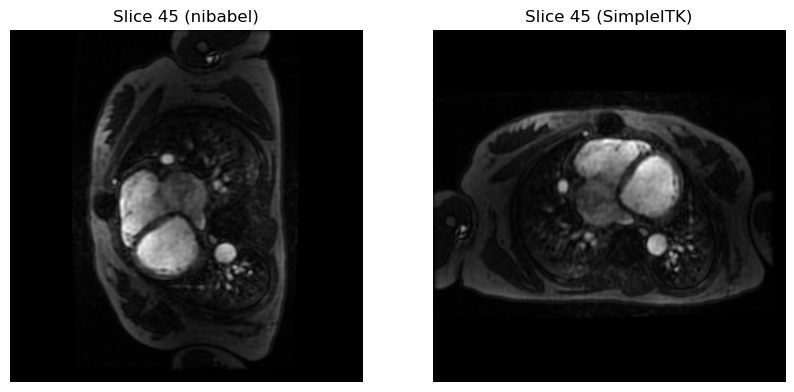

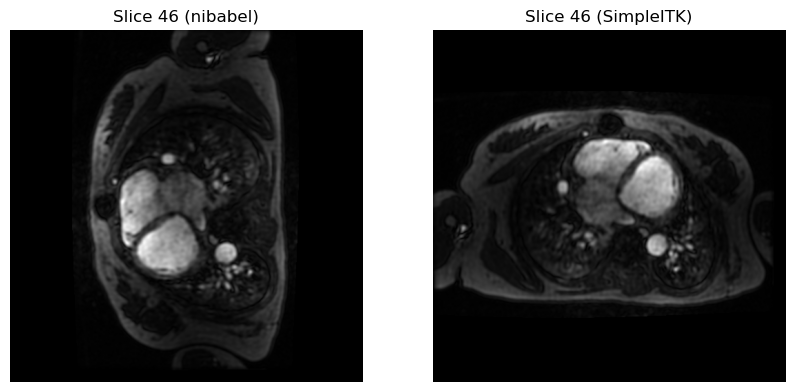

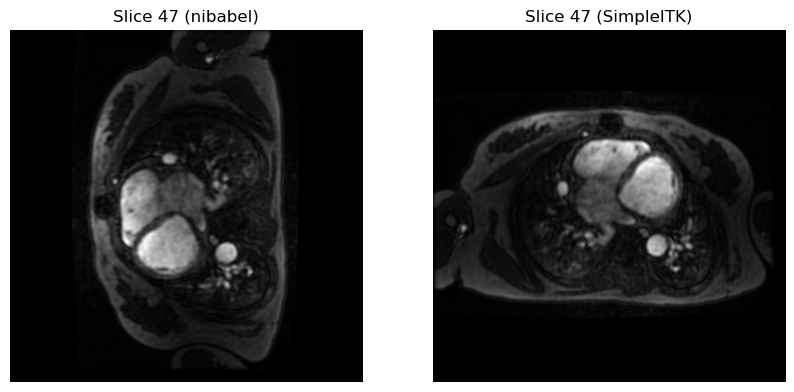

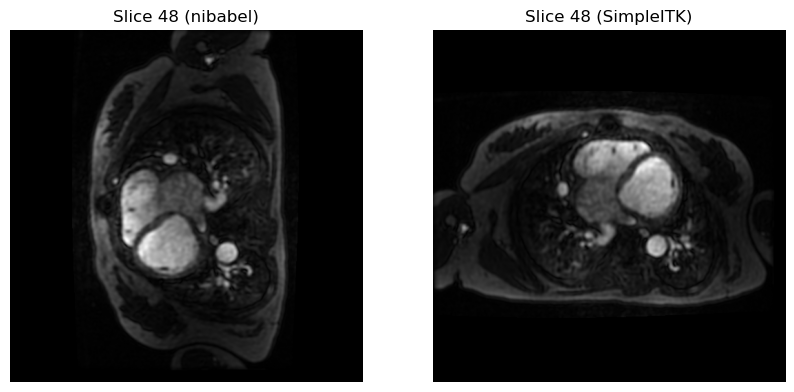

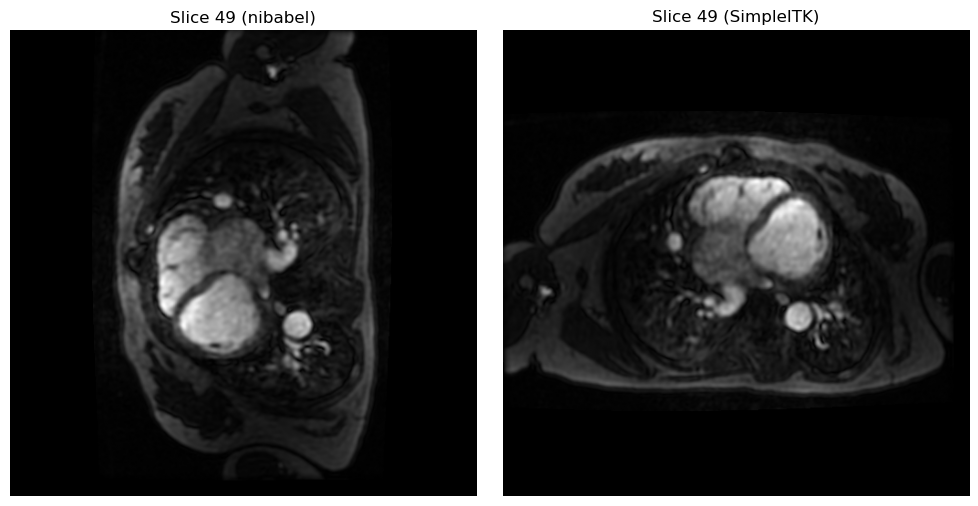

In [30]:
# plot the first 30 z slices of nifti_nib and nifti_sit as a series of plots with 2 subplots

import matplotlib.pyplot as plt

# Create figure with 2 rows and 15 columns


# Plot first 15 slices from nibabel data
for i in range(50):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(nifti_nib[:,:,i,0], cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f'Slice {i} (nibabel)')
    
    axes[1].imshow(nifti_sit[0,i,:,:], cmap='gray') 
    axes[1].axis('off')
    axes[1].set_title(f'Slice {i} (SimpleITK)')

plt.tight_layout()





## test a fix

In [32]:

# --- Input and output paths ---
fixed_path = "/home/ayeluru/vascular-superenhancement-4d-flow/working_dir/all_patients/patient_data/Amupam/nifti/3d_cine_Amupam_fixed.nii.gz"

# --- Load NIfTI ---
img = nib.load(nifti_path)
data = img.get_fdata()
affine = img.affine  # already RAS

# --- Flip voxel data from LPS → RAS (X: L→R, Y: P→A) ---
data_flipped = data[::-1, ::-1, ...]  # works for 3D or 4D

# --- Save corrected NIfTI ---
fixed_img = nib.Nifti1Image(data_flipped, affine)
fixed_img.set_qform(affine, code=1)
fixed_img.set_sform(affine, code=1)

hdr = fixed_img.header
hdr['dim'][0] = 4
hdr['dim'][4] = data_flipped.shape[3]
hdr['pixdim'][4] = 1.0  # or actual time spacing in seconds
hdr['xyzt_units'] = 2 | 8  # space in mm, time in seconds

nib.save(fixed_img, fixed_path)
print(f"✅ Saved corrected NIfTI to:\n{fixed_path}")

✅ Saved corrected NIfTI to:
/home/ayeluru/vascular-superenhancement-4d-flow/working_dir/all_patients/patient_data/Amupam/nifti/3d_cine_Amupam_fixed.nii.gz
